In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("/content/drive/MyDrive/FrontRow_Data Analyst Assignment.xlsx",1)
data.head(5)

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,...,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
0,2154.0,3539.0,2.0,2.0,4466.0,4426.0,4345.0,4345.0,2.0,4200.0,2.0,3902.0,3954.0,3980.0,3996.0,3902.0,3996.0,4026.0,3910.0,4039.0,3997.0,3712.0,3902.0,292.0,3902.0,8.0,4108.0,292.0,8.0,3833.0,3833.0,3811.0,8.0,2561.0,3733.0,3712.0,3090.0,2630.0,3.0,3.0,...,2760.0,2760.0,3.0,2760.0,2682.0,2682.0,2682.0,2760.0,2760.0,2710.0,2682.0,3.0,2630.0,3.0,2561.0,2509.0,221.0,135.0,6.0,2.0,2.0,1891.0,2.0,3.0,979.0,1.0,221.0,5.0,6247.0,434.0,538.0,628.0,3.0,6247.0,2.0,630.0,2.0,1524.0,3.0,3.0
1,6286.0,4522.0,4508.0,223.0,4467.0,4427.0,4386.0,2.0,4146.0,3902.0,3902.0,3903.0,3904.0,2234.0,3997.0,3996.0,2234.0,373.0,237.0,2234.0,3502.0,3787.0,4066.0,3787.0,292.0,292.0,4109.0,3787.0,3874.0,3760.0,3834.0,3812.0,3785.0,8.0,8.0,6.0,6.0,3158.0,3158.0,3158.0,...,3158.0,434.0,3038.0,2804.0,2760.0,2760.0,2760.0,2804.0,7.0,2649.0,7.0,7.0,6.0,365.0,436.0,364.0,365.0,2407.0,288.0,3.0,3.0,1892.0,3.0,1524.0,2150.0,2.0,5.0,288.0,364.0,435.0,539.0,629.0,817.0,364.0,3.0,364.0,630.0,1525.0,1524.0,817.0
2,NaN,4511.0,3539.0,4430.0,4468.0,4271.0,4271.0,4346.0,4271.0,4146.0,4146.0,2912.0,297.0,373.0,297.0,3997.0,3905.0,4027.0,64.0,4040.0,3910.0,4047.0,26.0,4047.0,3787.0,3787.0,2234.0,3303.0,3787.0,3303.0,3760.0,3760.0,18.0,3760.0,2354.0,7.0,7.0,6.0,7.0,7.0,...,6.0,3090.0,3039.0,2854.0,2804.0,2804.0,2804.0,365.0,2649.0,2711.0,2228.0,8.0,365.0,289.0,2562.0,2510.0,1893.0,1948.0,2354.0,221.0,7.0,222.0,1524.0,2056.0,1120.0,3.0,222.0,289.0,221.0,436.0,540.0,630.0,6247.0,6.0,6247.0,222.0,1388.0,364.0,817.0,6247.0
3,NaN,4523.0,4509.0,4431.0,4469.0,4428.0,4387.0,4347.0,4272.0,4201.0,4147.0,3904.0,2234.0,3981.0,373.0,4006.0,3910.0,4028.0,6289.0,47.0,237.0,3714.0,4047.0,297.0,4094.0,2234.0,4110.0,4122.0,3303.0,3386.0,292.0,18.0,2291.0,292.0,3734.0,8.0,2354.0,7.0,3443.0,1895.0,...,288.0,3091.0,2854.0,2855.0,2854.0,2561.0,434.0,8.0,2761.0,17.0,8.0,2649.0,289.0,8.0,1893.0,8.0,2471.0,139.0,291.0,7.0,1893.0,1893.0,1974.0,541.0,297.0,4.0,11.0,11.0,5.0,365.0,541.0,631.0,632.0,365.0,364.0,633.0,1389.0,541.0,6247.0,6274.0
4,NaN,4503.0,4510.0,2165.0,4470.0,223.0,4348.0,4271.0,4273.0,4202.0,4148.0,2234.0,3790.0,3866.0,3790.0,4007.0,4017.0,3910.0,245.0,3910.0,3169.0,297.0,3472.0,373.0,4095.0,4104.0,3865.0,4047.0,26.0,2954.0,3384.0,2291.0,3563.0,18.0,3735.0,2354.0,292.0,8.0,2354.0,18.0,...,2854.0,288.0,2855.0,8.0,2855.0,2909.0,2853.0,2354.0,293.0,294.0,2649.0,17.0,2631.0,1895.0,8.0,291.0,8.0,140.0,17.0,288.0,2228.0,1894.0,364.0,5.0,31.0,5.0,17.0,290.0,6.0,7.0,221.0,632.0,364.0,7.0,6.0,11.0,1103.0,437.0,6274.0,6.0


In [3]:
data.shape

(599, 91)

In [4]:
data.isnull().sum()

2020-01-01    597
2020-01-02    570
2020-01-03    557
2020-01-04    572
2020-01-05    508
             ... 
2020-03-27    297
2020-03-28    276
2020-03-29    272
2020-03-30    251
2020-03-31    192
Length: 91, dtype: int64

In [5]:
data.columns

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [6]:
# To get an approx idea of number of unique users and frequency of visits

temp=data.stack().reset_index(drop=True)
alpha=temp.value_counts()
maxusers = alpha.to_frame()
maxusers.reset_index(inplace=True)
maxusers.columns=["UserId","Visits"]
maxusers

,UserId,Visits
0,181.0,73
1,189.0,63
2,245.0,56
3,6286.0,55
4,1575.0,46
...,...,...
4589,1926.0,1
4590,3968.0,1
4591,3690.0,1
4592,4473.0,1


In [7]:
maxusers.drop("UserId",axis=1).describe()

,Visits
count,4594.000000
mean,2.944493
std,4.748196
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,73.000000


In [8]:
# To find top visitors and providing them rewards and coupons
#These are the top 10 loyal Users of the community
maxusers.nlargest(10, ['Visits'])

,UserId,Visits
0,181.0,73
1,189.0,63
2,245.0,56
3,6286.0,55
4,1575.0,46
5,40.0,45
6,6308.0,45
7,237.0,40
8,139.0,40
9,304.0,40


In [9]:
# Number of users visited the platform equal to or more than 30 times
maxusers.loc[maxusers["Visits"]>=30,"UserId"]

0      181.0
1      189.0
2      245.0
3     6286.0
4     1575.0
5       40.0
6     6308.0
7      237.0
8      139.0
9      304.0
10     204.0
11    6287.0
12    6288.0
13    6289.0
14    6248.0
15     324.0
16      18.0
17       8.0
18     153.0
19     317.0
20    2446.0
21     347.0
22    6290.0
23      60.0
24     134.0
25    2697.0
26    2666.0
27     309.0
28    3212.0
29     135.0
30     185.0
31     236.0
32     373.0
33     193.0
34    2619.0
35    6246.0
Name: UserId, dtype: float64

In [10]:
# Users who have only visited the platform only once
maxusers.loc[maxusers["Visits"]==1,"UserId"]

2008     865.0
2009    3780.0
2010    1785.0
2011    1021.0
2012    1898.0
         ...  
4589    1926.0
4590    3968.0
4591    3690.0
4592    4473.0
4593    1829.0
Name: UserId, Length: 2586, dtype: float64

In [11]:
# USERS AND FREQUENCY DATAFRAME FOR JANUARY VISITS
temp1=data[['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31']]
January_visits_ids = temp1.stack().reset_index(drop=True)
January_visits = January_visits_ids.value_counts()
January_visits = January_visits.to_frame()
January_visits.reset_index(inplace=True)
January_visits.columns=["UserId","January"]
January_visits

,UserId,January
0,3416.0,26
1,245.0,23
2,181.0,21
3,189.0,20
4,237.0,18
...,...,...
916,4094.0,1
917,4280.0,1
918,4229.0,1
919,4287.0,1


In [12]:
# USERS AND FREQUENCY DATAFRAME FOR FEBRUARY VISITS
temp2=data[['2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29']]
February_visits_ids = temp2.stack().reset_index(drop=True)
February_visits = February_visits_ids.value_counts()
February_visits = February_visits.to_frame()
February_visits.reset_index(inplace=True)
February_visits.columns=["UserId","February"]
February_visits

,UserId,February
0,2666.0,28
1,181.0,27
2,2619.0,25
3,1575.0,24
4,6308.0,24
...,...,...
1532,2400.0,1
1533,3344.0,1
1534,2784.0,1
1535,3252.0,1


In [13]:
# USERS AND FREQUENCY DATAFRAME FOR MARCH VISITS
temp3=data[['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31']]
March_visits_ids = temp3.stack().reset_index(drop=True)
March_visits = March_visits_ids.value_counts()
March_visits = March_visits.to_frame()
March_visits.reset_index(inplace=True)
March_visits.columns=["UserId","March"]
March_visits

,UserId,March
0,159.0,26
1,60.0,25
2,181.0,25
3,189.0,24
4,201.0,24
...,...,...
2808,2019.0,1
2809,1929.0,1
2810,1815.0,1
2811,1725.0,1


In [14]:
# Users who've visited the platform atleast once in every month
monthly_visiting_ids = np.intersect1d(March_visits.UserId, np.intersect1d(February_visits.UserId, January_visits.UserId)).tolist()
len(monthly_visiting_ids)

99

In [15]:
monthwise_visits_common = pd.merge(pd.merge(January_visits,February_visits,on='UserId'),March_visits,on='UserId')
monthwise_visits_common

,UserId,January,February,March
0,245.0,23,21,12
1,181.0,21,27,25
2,189.0,20,19,24
3,237.0,18,19,3
4,6286.0,17,19,19
...,...,...,...,...
94,348.0,1,2,2
95,94.0,1,9,6
96,607.0,1,2,2
97,407.0,1,4,2


In [16]:
from functools import reduce

In [17]:
dfs = [maxusers, January_visits, February_visits, March_visits]

In [18]:
dfs = [df.set_index('UserId') for df in dfs]
dfs

[        Visits
 UserId        
 181.0       73
 189.0       63
 245.0       56
 6286.0      55
 1575.0      46
 ...        ...
 1926.0       1
 3968.0       1
 3690.0       1
 4473.0       1
 1829.0       1
 
 [4594 rows x 1 columns],         January
 UserId         
 3416.0       26
 245.0        23
 181.0        21
 189.0        20
 237.0        18
 ...         ...
 4094.0        1
 4280.0        1
 4229.0        1
 4287.0        1
 4531.0        1
 
 [921 rows x 1 columns],         February
 UserId          
 2666.0        28
 181.0         27
 2619.0        25
 1575.0        24
 6308.0        24
 ...          ...
 2400.0         1
 3344.0         1
 2784.0         1
 3252.0         1
 3665.0         1
 
 [1537 rows x 1 columns],         March
 UserId       
 159.0      26
 60.0       25
 181.0      25
 189.0      24
 201.0      24
 ...       ...
 2019.0      1
 1929.0      1
 1815.0      1
 1725.0      1
 1239.0      1
 
 [2813 rows x 1 columns]]

In [19]:
# DataFrame of all the users with the number of times they've visited the platform
monthwise_visits_total = dfs[0].join(dfs[1:])
monthwise_visits_total.reset_index(inplace=True)
monthwise_visits_total.fillna(0, inplace=True)
monthwise_visits_total

,UserId,Visits,January,February,March
0,181.0,73,21.0,27.0,25.0
1,189.0,63,20.0,19.0,24.0
2,245.0,56,23.0,21.0,12.0
3,6286.0,55,17.0,19.0,19.0
4,1575.0,46,14.0,24.0,8.0
...,...,...,...,...,...
4589,1926.0,1,0.0,0.0,1.0
4590,3968.0,1,1.0,0.0,0.0
4591,3690.0,1,0.0,1.0,0.0
4592,4473.0,1,1.0,0.0,0.0


In [20]:
# Finding the number of users on the platform in the month of March and not in January and February
Only_march_visits = monthwise_visits_total.loc[(monthwise_visits_total["January"] == 0) & (monthwise_visits_total["February"] == 0) & (monthwise_visits_total["March"] != 0),["UserId","March"]]
print(len(Only_march_visits))
Only_march_visits.reset_index()
Only_march_visits

2328


,UserId,March
48,159.0,26.0
70,19.0,21.0
72,103.0,21.0
75,217.0,21.0
88,198.0,19.0
...,...,...
4584,777.0,1.0
4586,2528.0,1.0
4588,2102.0,1.0
4589,1926.0,1.0


In [21]:
# New Users and Old Users Percentage share for the month of March
new_users = March_visits["March"].sum() - Only_march_visits["March"].sum()
old_users= March_visits["March"].sum() - new_users
print("New users on the platform in the month of March = ", new_users)
print("Percentage of visits on the platform due to New Users in the month of March = {:.2f}".format((100*(new_users/March_visits["March"].sum()))))
print("Old users on the platform in the month of March = ", old_users)
print("Percentage of visits on the platform due to Old Users in the month of March = {:.2f}".format((100*(old_users/March_visits["March"].sum()))))

New users on the platform in the month of March =  2251.0
Percentage of visits on the platform due to New Users in the month of March = 31.74
Old users on the platform in the month of March =  4840.0
Percentage of visits on the platform due to Old Users in the month of March = 68.26


In [22]:
# New Users and Old Users Percentage share for the month of February
only_feb_visits = monthwise_visits_total.loc[(monthwise_visits_total.January == 0) & (monthwise_visits_total.February != 0) & (monthwise_visits_total.March == 0),:]
only_feb_visits.drop(["March","January"], axis=1, inplace=True)
#only_feb_visits.reset_index(drop=True)
new_users = February_visits["February"].sum() - only_feb_visits["February"].sum()
old_users= February_visits["February"].sum() - new_users
print("New users on the platform in the month of February = ", new_users)
print("Percentage of visits on the platform due to New Users in the month of February = {:.2f}".format((100*(new_users/February_visits["February"].sum()))))
print("Old users on the platform in the month of February = ", old_users)
print("Percentage of visits on the platform due to Old Users in the month of February = {:.2f}".format((100*(old_users/February_visits["February"].sum()))))

New users on the platform in the month of February =  2654.0
Percentage of visits on the platform due to New Users in the month of February = 61.42
Old users on the platform in the month of February =  1667.0
Percentage of visits on the platform due to Old Users in the month of February = 38.58


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
monthwise_visits_total.drop("UserId", axis=1).describe()

,Visits,January,February,March
count,4594.000000,4594.000000,4594.000000,4594.000000
mean,2.944493,0.460383,0.940575,1.543535
std,4.748196,1.573740,2.439727,2.663826
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,1.000000,2.000000
max,73.000000,26.000000,28.000000,26.000000


In [24]:
# GROWTH ANALYSIS FOR THE COMMON USERS WHOSE VISITS HAVE STRICTLY INCREASED IN THREE MONTHS
df_growth = monthwise_visits_total.loc[(monthwise_visits_total["March"]>monthwise_visits_total["February"]) & (monthwise_visits_total["February"]>monthwise_visits_total["January"]) & (monthwise_visits_total["January"] !=0) ,:]
print(len(df_growth))
df_growth

16


,UserId,Visits,January,February,March
10,204.0,39,6.0,15.0,18.0
15,324.0,36,3.0,15.0,18.0
24,134.0,31,3.0,12.0,16.0
33,193.0,30,3.0,11.0,16.0
43,723.0,27,3.0,10.0,14.0
66,416.0,23,1.0,9.0,13.0
69,243.0,21,1.0,7.0,13.0
83,133.0,20,1.0,5.0,14.0
100,615.0,17,1.0,6.0,10.0
108,87.0,17,3.0,4.0,10.0


In [25]:
# GROWTH ANALYSIS FOR THE COMMON USERS WHOSE VISITS HAVE BEEN EQUAL OR INCREASED IN THREE MONTHS
df_growth_eq = monthwise_visits_total.loc[(monthwise_visits_total["March"]>=monthwise_visits_total["February"]) & (monthwise_visits_total["February"]>=monthwise_visits_total["January"]) & (monthwise_visits_total["January"] !=0) ,:]
print(len(df_growth_eq))
df_growth_eq

30


,UserId,Visits,January,February,March
3,6286.0,55,17.0,19.0,19.0
10,204.0,39,6.0,15.0,18.0
15,324.0,36,3.0,15.0,18.0
24,134.0,31,3.0,12.0,16.0
33,193.0,30,3.0,11.0,16.0
39,64.0,28,9.0,9.0,10.0
43,723.0,27,3.0,10.0,14.0
66,416.0,23,1.0,9.0,13.0
67,183.0,23,1.0,11.0,11.0
69,243.0,21,1.0,7.0,13.0


In [26]:
# USERS WHO EITHER LEFT THE PLATFORM IN MARCH OR THE NUMBER OF VISITS IS STRICTLY DECREASING
df_dec = monthwise_visits_total.loc[(monthwise_visits_total["March"]<monthwise_visits_total["February"]) & (monthwise_visits_total["February"]<monthwise_visits_total["January"]),:]
print(len(df_dec))
df_dec

44


,UserId,Visits,January,February,March
2,245.0,56,23.0,21.0,12.0
11,6287.0,39,16.0,12.0,11.0
20,2446.0,33,16.0,15.0,2.0
32,373.0,30,11.0,10.0,9.0
40,2380.0,28,17.0,6.0,5.0
42,3416.0,28,26.0,2.0,0.0
45,2975.0,27,15.0,12.0,0.0
50,2234.0,25,13.0,9.0,3.0
52,1923.0,24,14.0,7.0,3.0
59,1774.0,23,14.0,6.0,3.0


In [27]:
# USERS WHO EITHER LEFT THE PLATFORM IN MARCH OR THE NUMBER OF VISITS IS EQUAL OR DECREASING TO PREVIOUS MONTH
df_dec_eq = monthwise_visits_total.loc[(monthwise_visits_total["March"]<=monthwise_visits_total["February"]) & (monthwise_visits_total["February"]<=monthwise_visits_total["January"]),:]
print(len(df_dec_eq))
df_dec_eq

776


,UserId,Visits,January,February,March
2,245.0,56,23.0,21.0,12.0
11,6287.0,39,16.0,12.0,11.0
20,2446.0,33,16.0,15.0,2.0
32,373.0,30,11.0,10.0,9.0
40,2380.0,28,17.0,6.0,5.0
...,...,...,...,...,...
4561,4082.0,1,1.0,0.0,0.0
4572,4147.0,1,1.0,0.0,0.0
4585,4000.0,1,1.0,0.0,0.0
4590,3968.0,1,1.0,0.0,0.0


In [28]:
# USERS WHO LEFT THE PLATFORM AFTER JANUARY
als = monthwise_visits_total.loc[(monthwise_visits_total["March"]==0) & (monthwise_visits_total["February"]==0) & (monthwise_visits_total["January"]!=0),:]
print(len(als))

704


In [29]:
# USERS WHO LEFT THE PLATFORM AFTER USING THE PLATFORM FOR JANUARY AND FEBRUARY
als1 = monthwise_visits_total.loc[(monthwise_visits_total["March"]==0) & (monthwise_visits_total["February"]!=0) & (monthwise_visits_total["January"]!=0),:]
print(len(als1))

93


In [30]:
# Number people who visited the platform in January, February, March
jan_visits=monthwise_visits_total["January"].sum()
jan_visits

2115.0

In [49]:
feb_visits=monthwise_visits_total["February"].sum()
print(feb_visits)
march_visits=monthwise_visits_total["March"].sum()
print(march_visits)

4321.0
7091.0


In [32]:
visits_monthwise = [jan_visits, feb_visits, march_visits]
Months=["Jan","Feb","March"]
monthsanalysis = pd.DataFrame(visits_monthwise,index=Months)
monthsanalysis.reset_index(inplace=True)
monthsanalysis.columns=["months","Total visits per months"]

monthsanalysis

,months,Total visits per months
0,Jan,2115.0
1,Feb,4321.0
2,March,7091.0


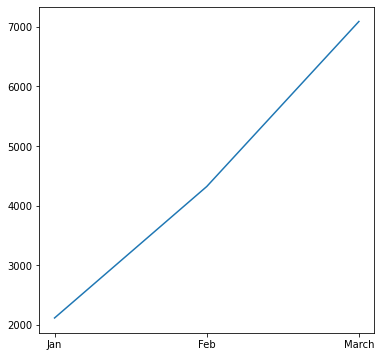

In [33]:
plt.figure(figsize=(6,6))
plt.plot(monthsanalysis["months"], monthsanalysis["Total visits per months"])

In [34]:
!pip install plotly
import plotly.offline as pyo

In [35]:
pyo.plot([{
    'x' : monthwise_visits_total["UserId"],
    'y' : monthwise_visits_total["January"]
}])

'temp-plot.html'

In [36]:
pyo.plot([{
    'x' : monthwise_visits_total["UserId"],
    'y' : monthwise_visits_total["February"]
}])

'temp-plot.html'

In [37]:
pyo.plot([{
    'x' : monthwise_visits_total["UserId"],
    'y' : monthwise_visits_total["March"]
}])

'temp-plot.html'

In [38]:
n = monthwise_visits_total.nunique(axis=0) 
n

UserId      4594
Visits        44
January       23
February      28
March         26
dtype: int64

In [39]:
# DAY-WISE NUMBER OF VISITORS TO THE PLATFORM 
n1 = data.nunique(axis=0) 
n1=n1.to_frame()
n1.columns=["IdsVisit"]
n1

,IdsVisit
2020-01-01,2
2020-01-02,29
2020-01-03,42
2020-01-04,27
2020-01-05,91
...,...
2020-03-27,302
2020-03-28,323
2020-03-29,327
2020-03-30,348


In [40]:
# FINDING TOTAL NUMBER OF VISITORS PER WEEK AND APPENDING IN A LIST
temp1=[]
Weekwise=[]
gamma=0
for i in n1["IdsVisit"]:
  gamma=gamma+i
  temp1.append(i)
  if(len(temp1) == 7) :
    Weekwise.append(gamma)
    temp1=[]
    gamma=0

print(Weekwise)

[435, 783, 264, 391, 669, 848, 887, 1408, 1218, 1093, 1507, 1650, 2374]


In [41]:
weeks=["Week1","Week2","Week3","Week4","Week5","Week6","Week7","Week8","Week9","Week10","Week11","Week12","Week13"]
weekanalysis = pd.DataFrame(Weekwise,index=weeks)
weekanalysis.reset_index(inplace=True)
weekanalysis.columns=["Weeks","Total visits per week"]

weekanalysis

,Weeks,Total visits per week
0,Week1,435
1,Week2,783
2,Week3,264
3,Week4,391
4,Week5,669
5,Week6,848
6,Week7,887
7,Week8,1408
8,Week9,1218
9,Week10,1093


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

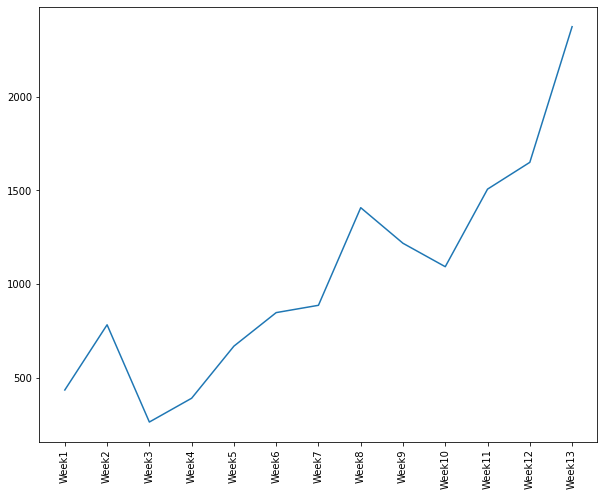

In [42]:
plt.figure(figsize=(10,8))
plt.plot(weekanalysis["Weeks"], weekanalysis["Total visits per week"])
plt.xticks(rotation=90)

In [43]:
# Cummulative sum for each day till 31st March which gives us idea about total number of Users till that day who have visited the platform
sum=0
daywise=[]
for i in n1["IdsVisit"]:
  sum=sum+i
  daywise.append(sum)

print(daywise)

[2, 31, 73, 100, 191, 306, 435, 567, 730, 894, 1038, 1117, 1171, 1218, 1268, 1323, 1359, 1394, 1420, 1454, 1482, 1548, 1609, 1652, 1703, 1735, 1782, 1873, 1958, 2018, 2115, 2203, 2313, 2420, 2542, 2656, 2751, 2903, 3013, 3128, 3272, 3390, 3515, 3636, 3787, 3933, 4045, 4171, 4277, 4476, 4680, 4904, 5154, 5344, 5500, 5685, 5873, 6077, 6272, 6436, 6604, 6745, 6903, 7011, 7137, 7289, 7421, 7599, 7812, 7996, 8209, 8374, 8548, 8769, 9009, 9265, 9503, 9649, 9819, 9997, 10239, 10478, 10810, 11153, 11487, 11820, 12122, 12445, 12772, 13120, 13527]


In [44]:
lstofdays=[]
x=range(91)
for i in x:
  i=i+1
  lstofdays.append(i)

In [45]:
daywiseanalysis = pd.DataFrame(daywise,index=lstofdays)
daywiseanalysis.reset_index(inplace=True)
daywiseanalysis.columns=["Days","Cummulative Sum"]

daywiseanalysis

,Days,Cummulative Sum
0,1,2
1,2,31
2,3,73
3,4,100
4,5,191
...,...,...
86,87,12122
87,88,12445
88,89,12772
89,90,13120


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

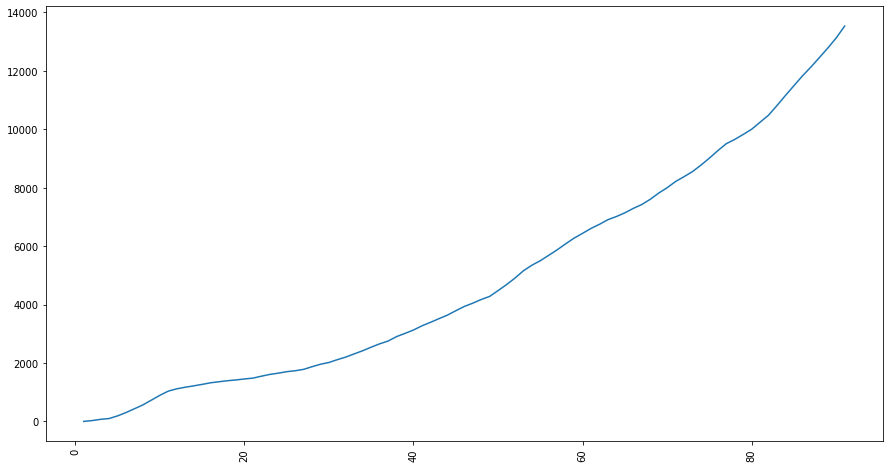

In [46]:
plt.figure(figsize=(15,8))
plt.plot(daywiseanalysis["Days"], daywiseanalysis["Cummulative Sum"])
plt.xticks(rotation=90)

In [48]:
 # Top 30 days with maximum number of visitors on Platform
 n1.nlargest(30, ['IdsVisit'])

,IdsVisit
2020-03-31,407
2020-03-30,348
2020-03-24,343
2020-03-25,334
2020-03-26,333
2020-03-23,332
2020-03-29,327
2020-03-28,323
2020-03-27,302
2020-03-16,256


In [51]:
# 30 Least Visit Days 
n1.nsmallest(30, ['IdsVisit'])

,IdsVisit
2020-01-01,2
2020-01-19,26
2020-01-04,27
2020-01-21,28
2020-01-02,29
2020-01-26,32
2020-01-20,34
2020-01-18,35
2020-01-17,36
2020-01-03,42
